<a href="https://colab.research.google.com/github/Sumit-Nayek/Data-Analytics-ans-Statistics-Assignment/blob/main/Code_mannual_assignment_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 48ms/step - accuracy: 0.3570 - loss: 1.7362 - val_accuracy: 0.5570 - val_loss: 1.2416
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 50ms/step - accuracy: 0.5815 - loss: 1.1789 - val_accuracy: 0.6193 - val_loss: 1.0692
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 47ms/step - accuracy: 0.6497 - loss: 0.9971 - val_accuracy: 0.6608 - val_loss: 0.9789
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.6889 - loss: 0.8871 - val_accuracy: 0.6643 - val_loss: 0.9632
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.7158 - loss: 0.8079 - val_accuracy: 0.6864 - val_loss: 0.8953
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 49ms/step - accuracy: 0.7395 - loss: 0.7434 - val_accuracy: 0.7022 - val_loss: 0.8742
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 46ms/step - accuracy: 0.7595 - loss: 0.6952 - val_accuracy: 0.6997 - val_loss: 0.8917
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 46ms/step - accuracy: 0.7762 -

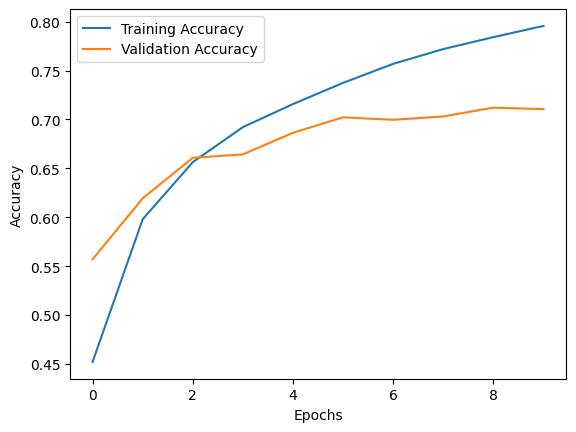

In [1]:
##1
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load CIFAR-10 Dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output classes
])

# Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the Model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Evaluate Model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")

# Plot Accuracy and Loss
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
## 2
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Paths
train_dir = "dog_dataset/train/"
validation_dir = "dog_dataset/validation/"

# Image Data Generators
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150),
                                                    batch_size=32, class_mode='categorical')
val_generator = val_datagen.flow_from_directory(validation_dir, target_size=(150, 150),
                                                batch_size=32, class_mode='categorical')

# Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(120, activation='softmax')  # 120 classes for dog breeds
])

# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the Model
history = model.fit(train_generator, validation_data=val_generator, epochs=15)

# Save the model
model.save("dog_breed_classifier.h5")


In [ ]:
## 3
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to dataset
train_dir = "breast_cancer/train/"
val_dir = "breast_cancer/validation/"

# Image Data Generator
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=30, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(128, 128),
                                                    batch_size=32, class_mode='binary')
val_generator = val_datagen.flow_from_directory(val_dir, target_size=(128, 128),
                                                batch_size=32, class_mode='binary')

# Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the Model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the Model
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

# Save the model
model.save("breast_cancer_classifier.h5")


In [ ]:
## 4
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Paths
train_dir = "plant_disease/train/"
val_dir = "plant_disease/validation/"

# Image Data Generators
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150),
                                                    batch_size=32, class_mode='categorical')
val_generator = val_datagen.flow_from_directory(val_dir, target_size=(150, 150),
                                                batch_size=32, class_mode='categorical')

# Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(len(train_generator.class_indices), activation='softmax')  # Output layer
])

# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the Model
history = model.fit(train_generator, validation_data=val_generator, epochs=20)

# Save the model
model.save("plant_disease_detector.h5")
